In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Load the Diabetes dataset (hint: convert it into Pandas DataFrame for better analysis)

In [17]:
# Load the Diabetes dataset
diabetes = load_diabetes(as_frame=True)

# Convert into Pandas DataFrame
df = diabetes.frame


### Display first few rows

In [31]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Visualize the data (i.e. histograms, heatmaps etc)

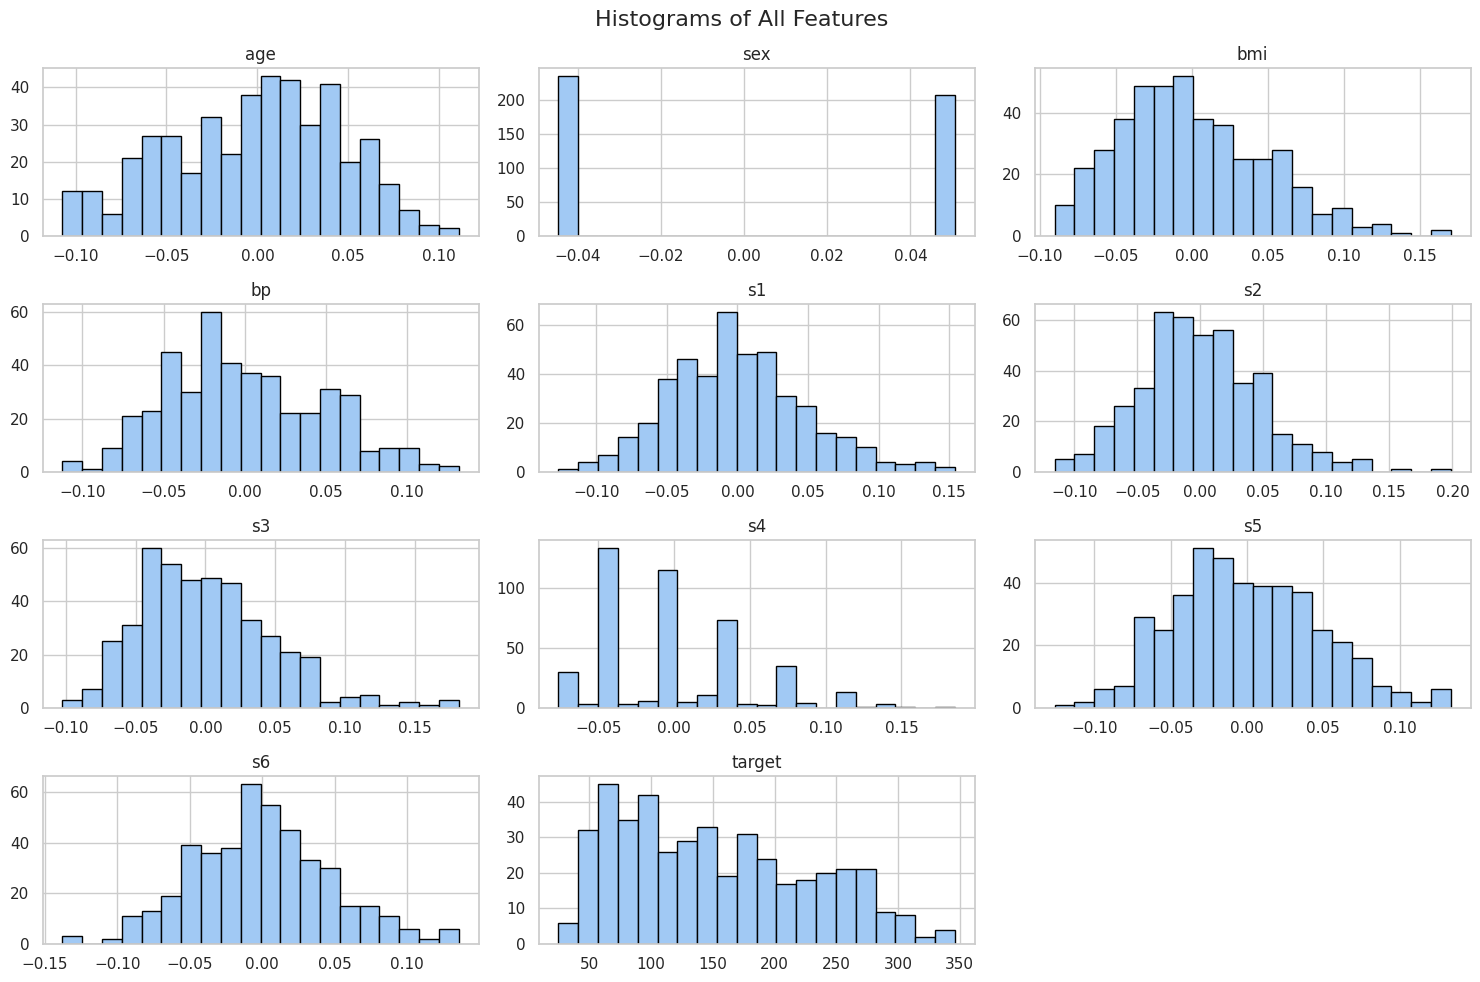

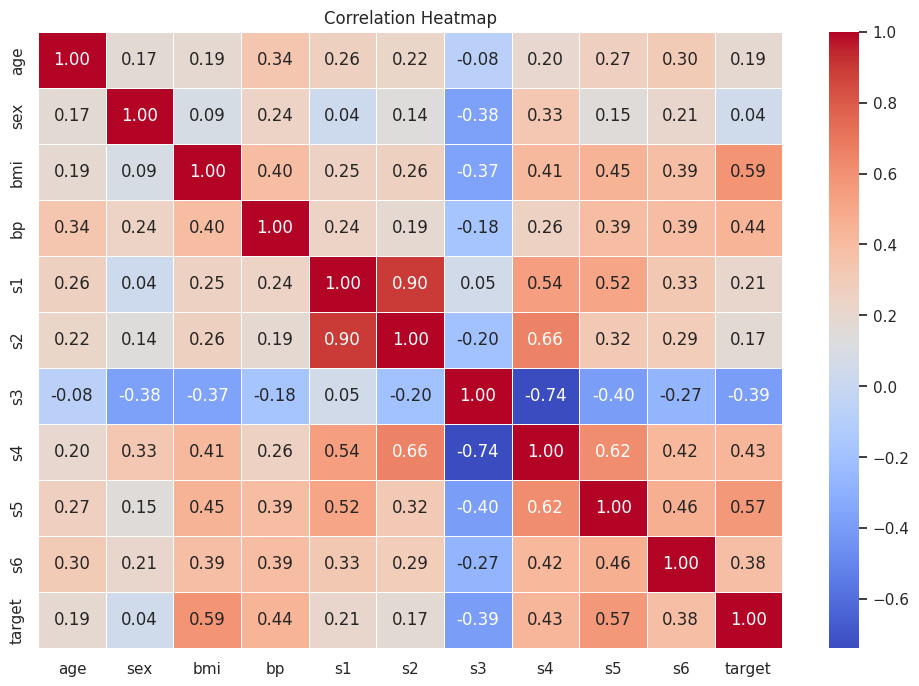

In [19]:
sns.set(style="whitegrid", palette="pastel")
#histrogram
df.hist(bins=20, figsize=(15,10), edgecolor='black')
plt.suptitle("Histograms of All Features", fontsize=16)
plt.tight_layout()
plt.show()

#heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

###Standardize the features


### Visualize the standardized data

What do you observe?

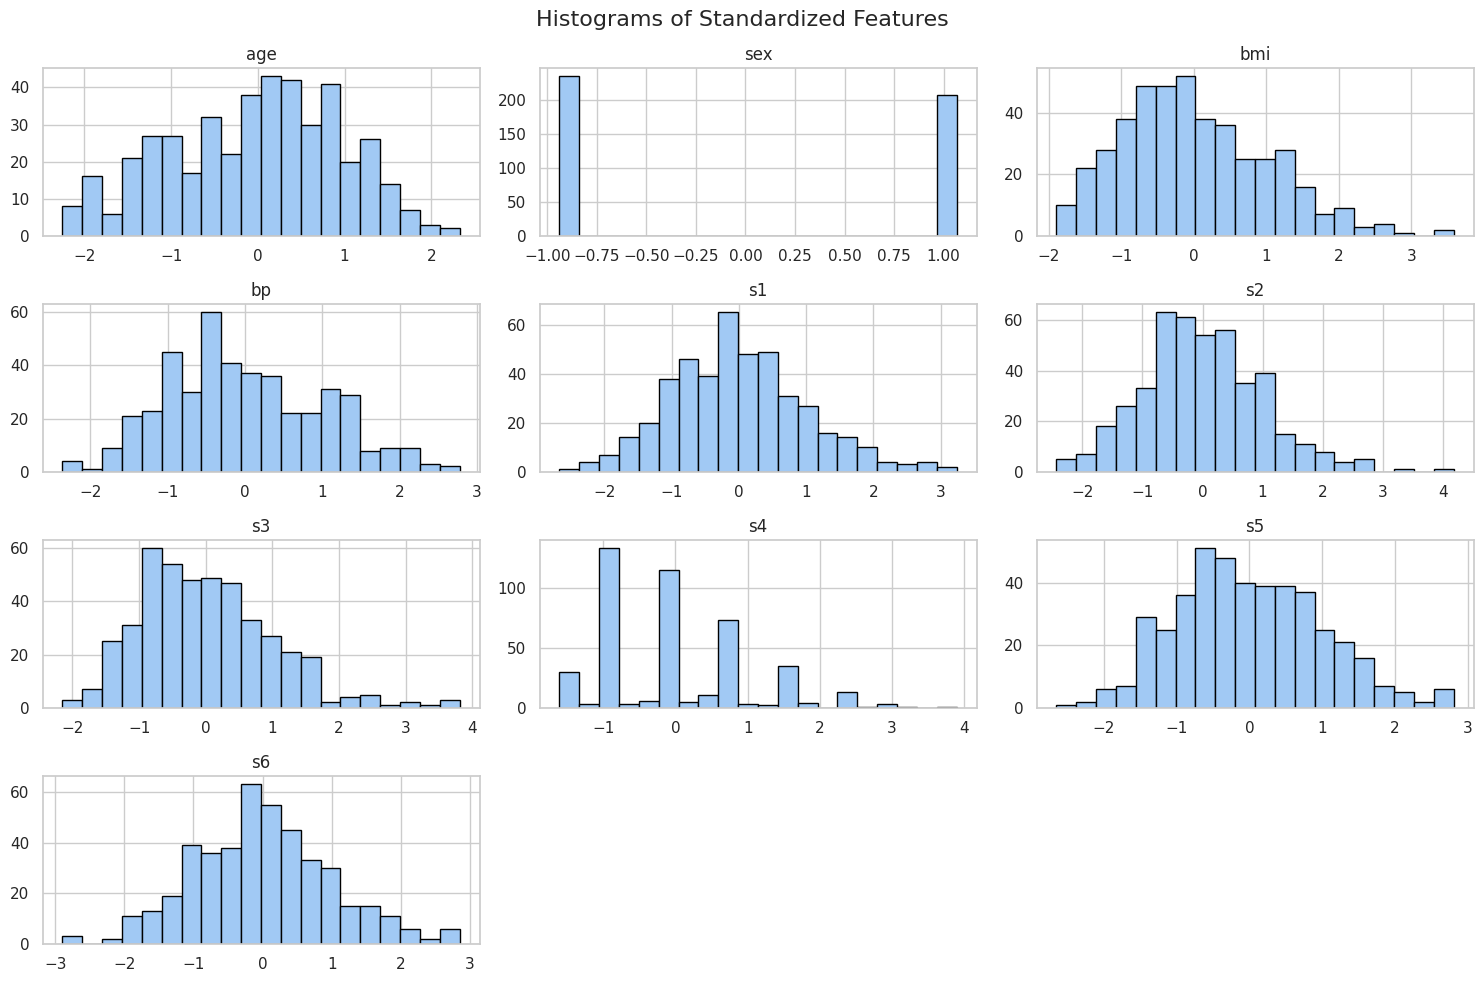

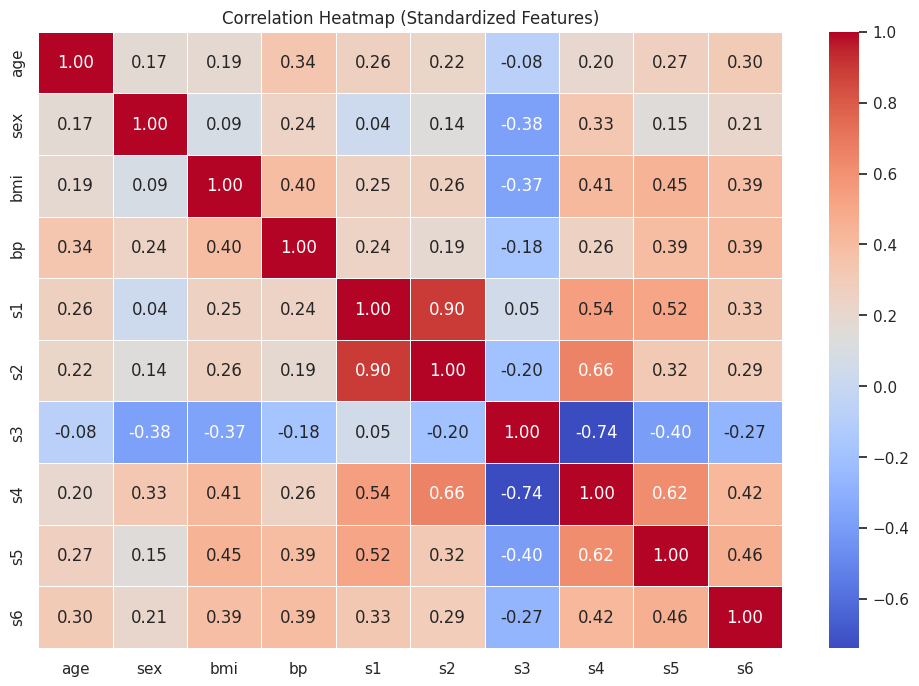

In [20]:
X = df.drop(columns="target")
y = df['target']

scaler = StandardScaler()
#histogram of standardized features
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of Standardized Features", fontsize=16)
plt.tight_layout()
plt.show()

#heatmap of standardized features
plt.figure(figsize=(12, 8))
sns.heatmap(X_scaled_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Standardized Features)")
plt.show()


## Apply PCA

In [21]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

## Plot the explained variance

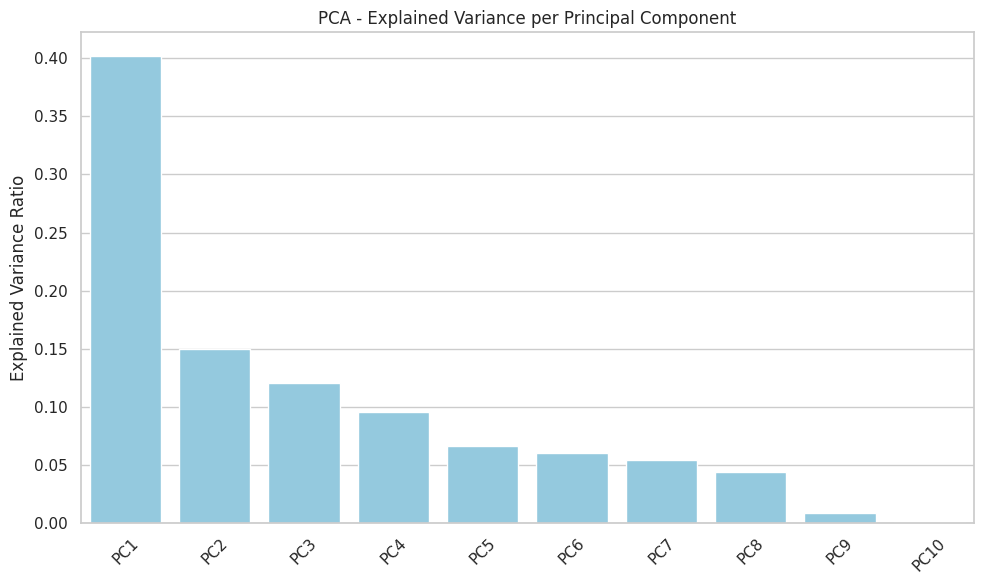

In [22]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
sns.barplot(x=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_, color='skyblue')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance per Principal Component')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Choose the optimal number of components

Why did you select this number?

 By reducing the dimensionality from 10 to 6, it improves performance and helps mitigate overfitting while retaining approximately 95% of the dataset's information. Additionally, this choice filters out lower-variance components that are more likely to capture noise rather than meaningful signal, ensuring cleaner, more reliable results.

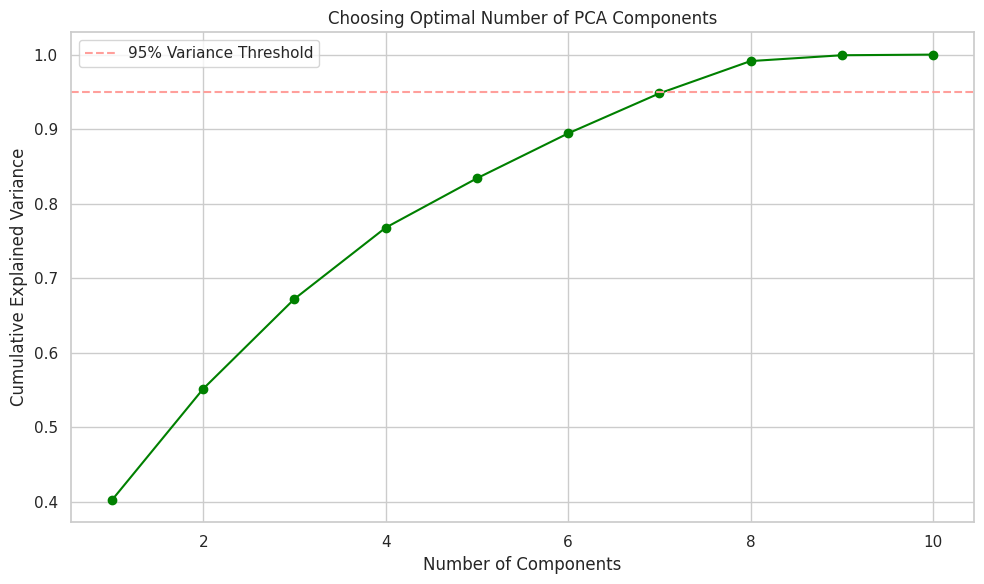

In [23]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color='green')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing Optimal Number of PCA Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

optimal_components = 6
pca_opt = PCA(n_components=optimal_components)
X_pca_opt = pca_opt.fit_transform(X_scaled)



## Perform Regression using the original data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score (Test Set): {r2:.4f}")
print(f"Mean Squared Error (Test Set): {mse:.2f}")

R² Score (Test Set): 0.4526
Mean Squared Error (Test Set): 2900.19


## Perform regression using the PCA-transformed data

In [25]:
optimal_components = 6
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = lr_pca.predict(X_test_pca)
r2_pca = r2_score(y_test_pca, y_pred_pca)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)

print(f"R² Score with PCA: {r2_pca:.4f}")
print(f"Mean Squared Error with PCA: {mse_pca:.2f}")

R² Score with PCA: 0.4388
Mean Squared Error with PCA: 2973.09


## Display the results

                Model  R² Score          MSE
0   Original Features  0.452603  2900.193628
1  PCA (6 Components)  0.438843  2973.092926


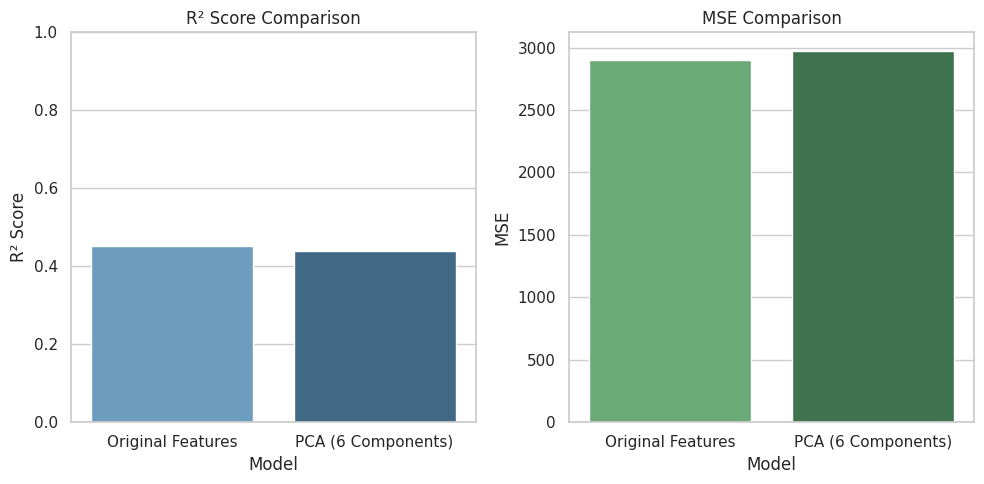

In [27]:
# Create a summary DataFrame
results_df = pd.DataFrame({
    "Model": ["Original Features", "PCA (6 Components)"],
    "R² Score": [r2, r2_pca],
    "MSE": [mse, mse_pca]
})

# Display the table
print(results_df)

# Optional: Bar plot for visual comparison
plt.figure(figsize=(10, 5))

# R² Score Comparison
plt.subplot(1, 2, 1)
sns.barplot(x="Model", y="R² Score", hue="Model", data=results_df, palette="Blues_d", legend=False)
plt.ylim(0, 1)
plt.title("R² Score Comparison")

# MSE Comparison
plt.subplot(1, 2, 2)
sns.barplot(x="Model", y="MSE", hue="Model", data=results_df, palette="Greens_d", legend=False)
plt.title("MSE Comparison")

plt.tight_layout()
plt.show()


## Principal Component Interpretation

Analyze the PCA components to understand which original features contribute most to each principal component (hint: use *pca_optimal.components_* )

In [32]:
loadings = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

loadings.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
PC1,0.216431,0.186967,0.303162,0.271738,0.343255,0.351861,-0.282437,0.428834,0.378618,0.322183
PC2,0.044367,-0.386547,-0.156281,-0.138266,0.573027,0.455942,0.506239,-0.068181,-0.026187,-0.084949
PC3,0.494668,-0.106864,0.167527,0.513571,-0.068579,-0.269689,0.386032,-0.380680,0.063630,0.276842
PC4,0.414012,0.679860,-0.499825,0.019662,0.068396,0.167774,0.076020,-0.007921,-0.264427,-0.087085
PC5,0.686876,-0.373464,-0.129333,-0.486874,-0.129180,-0.116722,-0.245001,0.143646,0.151639,-0.031423


### Visualize components weights (heatmap)

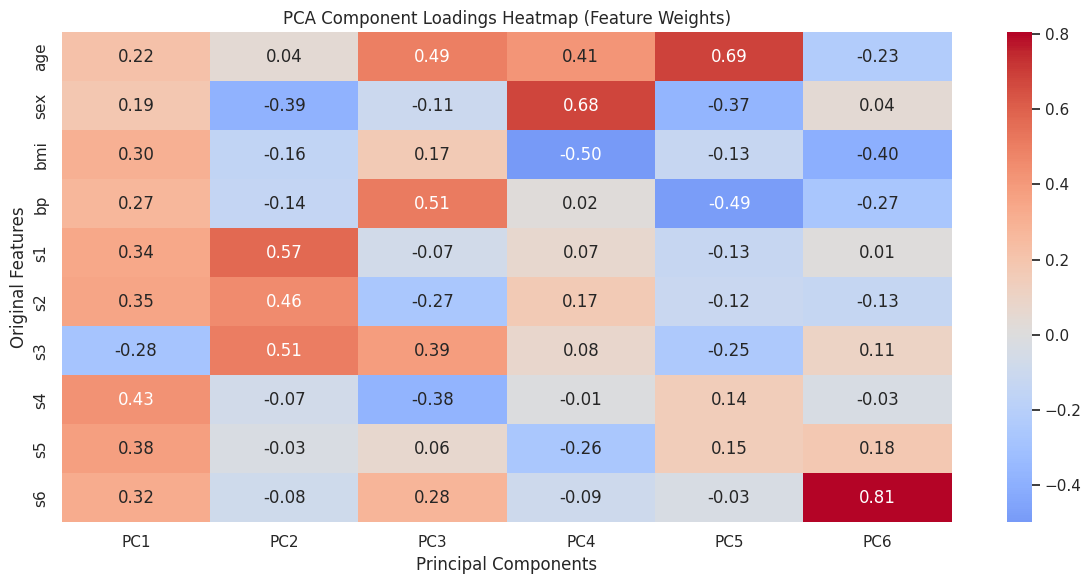

In [30]:
plt.figure(figsize=(12, 6))
sns.heatmap(loadings.T, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("PCA Component Loadings Heatmap (Feature Weights)")
plt.xlabel("Principal Components")
plt.ylabel("Original Features")
plt.tight_layout()
plt.show()

**Questions:**


*   How does PCA impact regression performance?
*   Compare the results: Does reducing dimensionality improve or worsen the prediction accuracy?
* Would you recommend using PCA before regression on this dataset? Why or why not?



- How does PCA impact regression performance?

PCA impacts regression performance by transforming the data into uncorrelated principal components, which reduces multicollinearity—a challenge for linear regression—while compressing the dataset to remove noise and redundant features. This can enhance model performance, especially with high-dimensional or noisy data. However, PCA trades interpretability, as principal components lack intuitive meaning (e.g., “BMI” or “blood pressure”), and excessive compression risks discarding useful predictive signals.

- Compare the results: Does reducing dimensionality improve or worsen the prediction accuracy?

Slightly worse performance after applying PCA.
Why? Because the original dataset only had 10 features — not very high dimensional — and PCA likely discarded some subtle but important information.

- Would you recommend using PCA before regression on this dataset? Why or why not?

I would not recommend using PCA before regression on this dataset, as it is not strictly necessary. The dataset contains only 10 features, which does not warrant heavy dimensionality reduction. Regression performed slightly better with standardized original features, which retain interpretability (e.g., BMI, age). Furthermore, there is no clear evidence of severe multicollinearity negatively affecting model performance.